# **Week 7: Introduction to Statistics for Data Science**

In [28]:
import pandas as pd 

In [35]:
path = r"../Datasets/sales_data.csv"

In [36]:
df = pd.read_csv(path)

In [37]:
df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [38]:
# Fill missing values with defaults
df_fill = df.fillna({
    "Date": df["Date"].mode()[0],          # most frequent date
    "Product": df["Product"].mode()[0],    # most frequent product
    "Quantity": df["Quantity"].median(),   # median quantity
    "Price": df["Price"].median(),         # median price
    "Customer_ID": "Unknown",              # placeholder
    "Region": df["Region"].mode()[0],      # most frequent region
    "Total_Sales": df["Total_Sales"].median()  # median sales
})

##  1. Descriptive Statistic

In [39]:
# Comprehensive descriptive statistics
desc_stats = df.describe(include="all")
desc_stats

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
count,100,100,100.000000,100.000000,100,100,100.000000
unique,100,5,NaN,NaN,100,4,NaN
top,2024-01-01,Tablet,NaN,NaN,CUST001,North,NaN
freq,1,26,NaN,NaN,1,28,NaN
mean,NaN,NaN,4.780000,25808.510000,NaN,NaN,123650.480000
std,NaN,NaN,2.588163,13917.630242,NaN,NaN,100161.085275
min,NaN,NaN,1.000000,1308.000000,NaN,NaN,6540.000000
25%,NaN,NaN,2.750000,14965.250000,NaN,NaN,39517.500000
50%,NaN,NaN,5.000000,24192.000000,NaN,NaN,97955.500000
75%,NaN,NaN,7.000000,38682.250000,NaN,NaN,175792.500000


In [40]:
# Additional business-specific stats
print("Total Revenue:", df["Total_Sales"].sum())
print("Average Sales per Transaction:", df["Total_Sales"].mean())
print("Sales by Region:\n", df.groupby("Region")["Total_Sales"].sum())

Total Revenue: 12365048
Average Sales per Transaction: 123650.48
Sales by Region:
 Region
East     2519639
North    3983635
South    3737852
West     2123922
Name: Total_Sales, dtype: int64


## 2. Data Distribution (Histograms + Density Plots)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

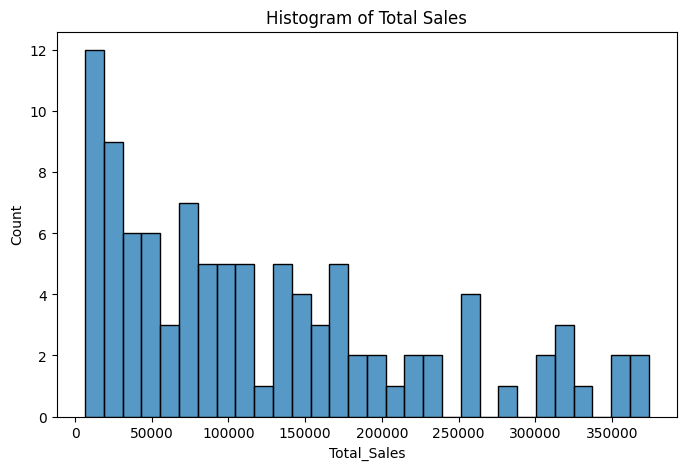

In [42]:

# Histogram of Total Sales
plt.figure(figsize=(8,5))
sns.histplot(df["Total_Sales"], bins=30, kde=False)
plt.title("Histogram of Total Sales")
plt.show()

C:\Users\subha\AppData\Local\Temp\ipykernel_2540\3657863019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Total_Sales"], shade=True)


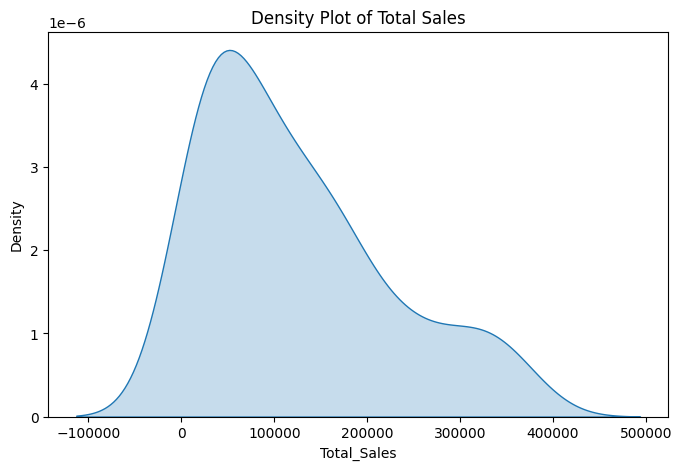

In [43]:
# Density plot
plt.figure(figsize=(8,5))
sns.kdeplot(df["Total_Sales"], shade=True)
plt.title("Density Plot of Total Sales")
plt.show()

## 3. Hypothesis Tests 

In [45]:
from scipy import stats

# Split data by region
region_A = df[df["Region"]=="North"]["Total_Sales"]
region_B = df[df["Region"]=="South"]["Total_Sales"]

# Independent t-test
t_stat, p_val = stats.ttest_ind(region_A, region_B, equal_var=False)
print("T-test between North & South regions:")
print("t-statistic:", t_stat, "\np-value:", p_val)

T-test between North & South regions:
t-statistic: 0.12990909486062338 
p-value: 0.8971521399586031


In [46]:
# Example: Test if average Quantity > 10 (one-sample t-test) 
t_stat, p_val = stats.ttest_1samp(df["Quantity"], 10)
print("One-sample t-test for Quantity > 10")
print("t-statistic:", t_stat, "p-value:", p_val)

One-sample t-test for Quantity > 10
t-statistic: -20.168747961990686 p-value: 7.712499760687688e-37


In [47]:
# Example: Test correlation between Price & Total_Sales 
corr, p_val = stats.pearsonr(df["Price"], df["Total_Sales"])
print("Correlation test between Price & Total Sales")
print("Correlation:", corr, "p-value:", p_val)

Correlation test between Price & Total Sales
Correlation: 0.6461309528798176 p-value: 3.882163217636893e-13


##  4. Correlation Analysis

             Quantity     Price  Total_Sales
Quantity     1.000000  0.008014     0.688107
Price        0.008014  1.000000     0.646131
Total_Sales  0.688107  0.646131     1.000000


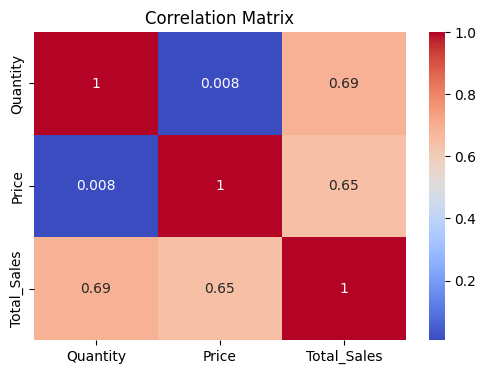

In [48]:
# Correlation matrix
corr_matrix = df[["Quantity","Price","Total_Sales"]].corr()
print(corr_matrix)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 5. Confidence Intervals

In [49]:
import numpy as np

# 95% CI for mean Total Sales
sales_mean = df["Total_Sales"].mean()
sales_std = df["Total_Sales"].std()
n = len(df)

ci_low, ci_high = stats.norm.interval(0.95, loc=sales_mean, scale=sales_std/np.sqrt(n))
print("95% Confidence Interval for Total Sales Mean:", (ci_low, ci_high))

95% Confidence Interval for Total Sales Mean: (np.float64(104019.26802085702), np.float64(143281.69197914295))
